Task 1: Data Preprocessing

In [277]:
# Importing required libraries and loading the dataset
import pandas as pd
import numpy as np 
df= pd.read_csv("Data1.csv")

In [279]:
df.head()
df.describe()

,X,Y
count,1.000000e+03,1000.000000
mean,-4.440892e-18,0.954743
std,5.782171e-01,1.809135
min,-1.000000e+00,-5.091491
25%,-5.000000e-01,-0.106178
50%,5.009014e-17,0.912120
75%,5.000000e-01,1.967479
max,1.000000e+00,6.559203


In [281]:
X, y = df.X.values.reshape(-1, 1), df.Y.values  # Creating the arrays

In [283]:
X.shape,y.shape

((1000, 1), (1000,))

In [285]:
# Normalization 
X_mean= np.mean(X)
X_std= np.std(X)
X_mean,X_std

(-4.440892098500626e-18, 0.5779279084228418)

In [287]:
X_normalized= (X-X_mean)/X_std
X_normalized

array([[ 1.709535  ],
       [ 1.24534515],
       [-0.69801682],
       [ 0.18532953],
       [ 0.59755783],
       [ 1.63332473],
       [-1.63678883],
       [-0.93011175],
       [-0.670304  ],
       [ 0.71533734],
       [-0.01212436],
       [ 0.20265005],
       [ 0.9855374 ],
       [-0.90239892],
       [ 0.27193211],
       [-1.53979394],
       [ 1.40815801],
       [-1.12410154],
       [-1.68182218],
       [-1.46358366],
       [-1.62293242],
       [-0.06408591],
       [-0.65644758],
       [-0.65298348],
       [ 1.32848363],
       [ 0.99939382],
       [-1.57443497],
       [-1.37351698],
       [ 0.90239892],
       [-1.72685552],
       [ 1.12063743],
       [ 0.72919375],
       [ 0.39663983],
       [ 1.00632202],
       [-0.31696546],
       [ 0.81926044],
       [ 1.58482728],
       [-0.4624578 ],
       [ 1.44972725],
       [-0.80540403],
       [-0.93357585],
       [ 1.71992731],
       [ 0.469386  ],
       [ 0.68762451],
       [-0.86082968],
       [ 0

In [289]:
# Shuffling the data
index= np.arange(X_normalized.shape[0])
np.random.shuffle(index)

In [291]:
X_normalized,y

(array([[ 1.709535  ],
        [ 1.24534515],
        [-0.69801682],
        [ 0.18532953],
        [ 0.59755783],
        [ 1.63332473],
        [-1.63678883],
        [-0.93011175],
        [-0.670304  ],
        [ 0.71533734],
        [-0.01212436],
        [ 0.20265005],
        [ 0.9855374 ],
        [-0.90239892],
        [ 0.27193211],
        [-1.53979394],
        [ 1.40815801],
        [-1.12410154],
        [-1.68182218],
        [-1.46358366],
        [-1.62293242],
        [-0.06408591],
        [-0.65644758],
        [-0.65298348],
        [ 1.32848363],
        [ 0.99939382],
        [-1.57443497],
        [-1.37351698],
        [ 0.90239892],
        [-1.72685552],
        [ 1.12063743],
        [ 0.72919375],
        [ 0.39663983],
        [ 1.00632202],
        [-0.31696546],
        [ 0.81926044],
        [ 1.58482728],
        [-0.4624578 ],
        [ 1.44972725],
        [-0.80540403],
        [-0.93357585],
        [ 1.71992731],
        [ 0.469386  ],
        [ 0

In [293]:
# Splitting the data using 80% for training and 20% for testing
train_size = int(0.8 * len(X_normalized))
X_train, X_test = X_normalized[index[:train_size]], X_normalized[index[train_size:]]
y_train, y_test = y[index[:train_size]], y[index[train_size:]]

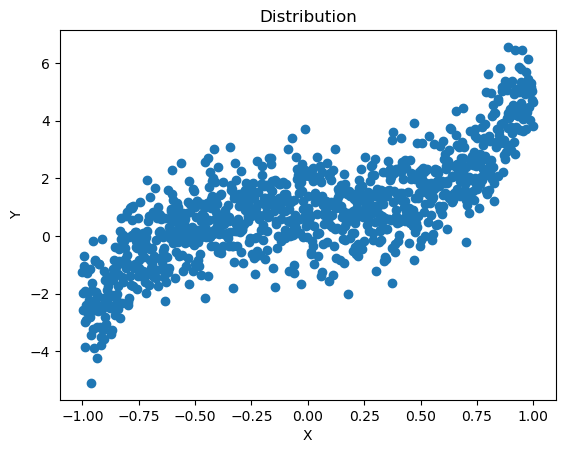

In [295]:
# Visualizing the distribution
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Distribution')
plt.show()

Task 2: Polynomial Regression and Regularization

In [297]:
# Function to generate polynomial features
def poly_features(X,degree):
    X_poly = np.ones((X.shape[0], 1)) # Intercept term is a column of ones
    for i in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X ** i))
    return X_poly

In [299]:
# Function to implement gradient descent
def gradient_descent(X, y, lr, epochs):
    m, n = X.shape
    w = np.zeros(n) # Initialized weights
    b = 0  # Bias term
    for epoch in range(epochs):
        y_pred = X @ w + b
        errors = y_pred - y
        dldw = (2/m) * (X.T @ errors)
        db = (2/m) * np.sum(errors)
        w = w - lr * dldw
        b = b - lr * db
    return w, b

In [301]:
# Function to calculate mean squared error
def mse(y_true,y_hat):
    return np.mean((y_true-y_hat)**2)

In [350]:
# Calculating training and testing errors for polynomials of degrees 1 to 9
train_error = []
test_error = []
degrees = range(1,10)
learning_rate = 0.0001
given_epochs = 500
for degree in degrees:
    X_train_poly = poly_features(X_train, degree)
    X_test_poly = poly_features(X_test, degree)
    w, b = gradient_descent(X_train_poly, y_train, lr=learning_rate, epochs=given_epochs)
    train_pred = X_train_poly @ w + b
    test_pred = X_test_poly @ w + b
    train_error.append(mse(y_train, train_pred))
    test_error.append(mse(y_test, test_pred))

In [352]:
print('Train error: ', train_error)
print('\nTest error: ', test_error)

Train error:  [3.6526532731800203, 3.5088413653280996, 2.4067991455818323, 2.2429608595241586, 1.3994145517227539, 1.4526297307185552, 1.5851511019898084, 1.5878521907914784, 1.5825078200320843]

Test error:  [2.96059367928392, 2.876121148461363, 1.9591105546083822, 1.917849034298718, 1.2815043863291726, 1.345910569726173, 1.4673382968394157, 1.4591412574069391, 1.4480353503765309]


Plot 1

Text(0, 0.5, 'MSE')

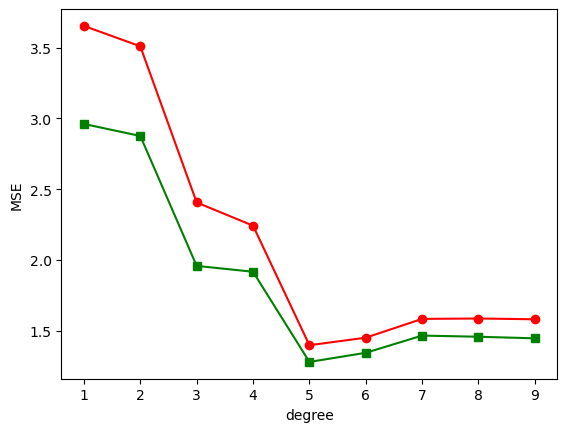

In [354]:
# Plotting the mean squared errors vs degree of polynomial
plt.plot(degrees,train_error, color='red', label='train error', marker='o')
plt.plot(degrees,test_error, color= 'green', label='test error', marker='s')
plt.xlabel("degree")
plt.ylabel('MSE')

In [448]:
# Gradient descent with L2 regularization (Ridge Regression)
def gradient_descent_ridge(X, y, lr, epochs, lambda_param):
    m, n = X.shape
    w=np.zeros(n)
    b=0
    for epoch in range(epochs):
        y_pred = X @ w + b
        error = y_pred - y
        dldw = (2/m) * (X.T @ error) + 2 * lambda_param * (w.T @ w)
        db = (2/m) * np.sum(error)
        w = w - lr*dldw
        b = b - lr*db
    return w, b

In [450]:
# Taking 10 values of lambda between 10^-8 and 1
lambdas = np.logspace(-8, 0, 10)

In [452]:
# Function to calculate bias^2, variance and total error for each degree of polynomial for given values of lambda
def bias_variance_decomposition(X_train, X_test, y_train, y_test, degrees, lambdas, lr, epochs):
    bias_square = []
    variance = []
    total_error = []
    w_best = []
    min_error = 1e10
    for degree in degrees:
        X_train_poly = poly_features(X_train, degree)
        X_test_poly = poly_features(X_test, degree)
        bias_sq_for_lambda = []
        var_for_lambda = []
        total_error_for_lambda = []
        for lambda_param in lambdas:
            w, b = gradient_descent_ridge(X_train_poly, y_train, lr, epochs, lambda_param)
            y_train_pred = X_train_poly @ w + b
            y_test_pred = X_test_poly @ w + b
            bias_sq = np.mean((y_test_pred - y_test.mean()) ** 2) # Calculating bias^2
            var = np.mean((y_test_pred - y_test_pred.mean()) ** 2) # Calculating variance            
            total_err = bias_sq + var # Total error = bias^2 + variance
            bias_sq_for_lambda.append(bias_sq)
            var_for_lambda.append(var)
            total_error_for_lambda.append(total_err)
            if total_err < min_error:
                min_error = total_err
                w_best = w
                b_best = b
        bias_square.append(bias_sq_for_lambda)
        variance.append(var_for_lambda)
        total_error.append(total_error_for_lambda)
    return bias_square, variance, total_error, w_best, b_best

In [454]:
degrees = range(1, 10)
bias_square, variance, total_error, w_best, b_best = bias_variance_decomposition(X_train, X_test, y_train, y_test, degrees, lambdas, lr=0.0001, epochs=500)

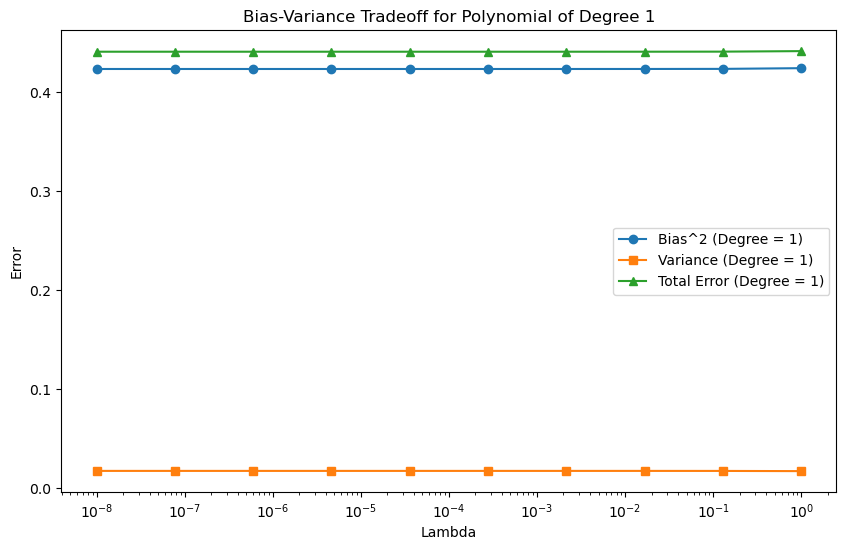

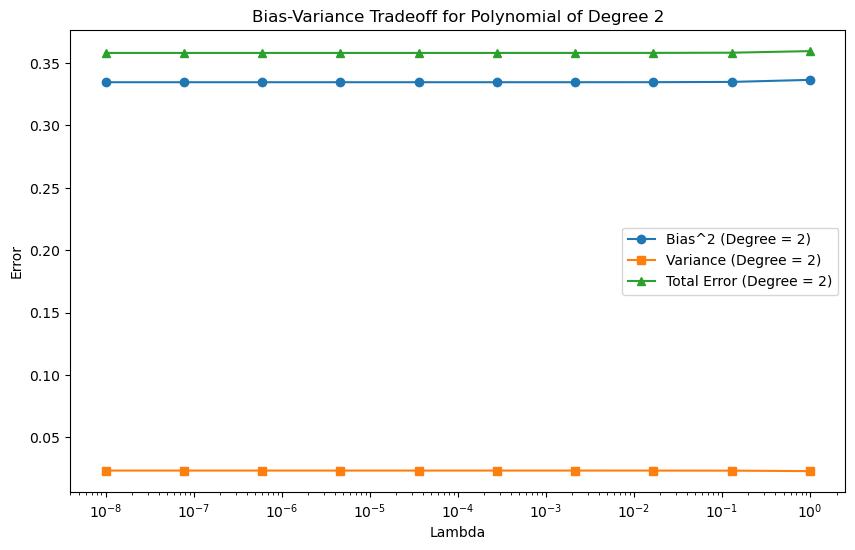

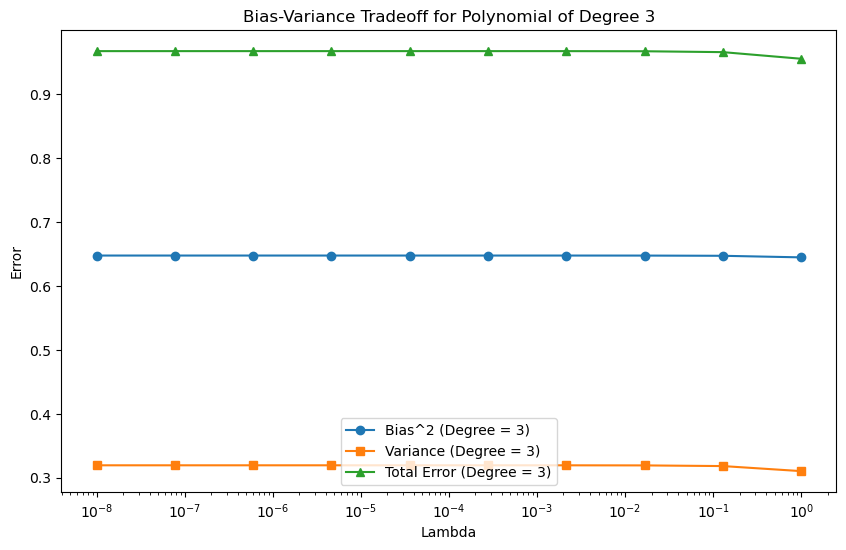

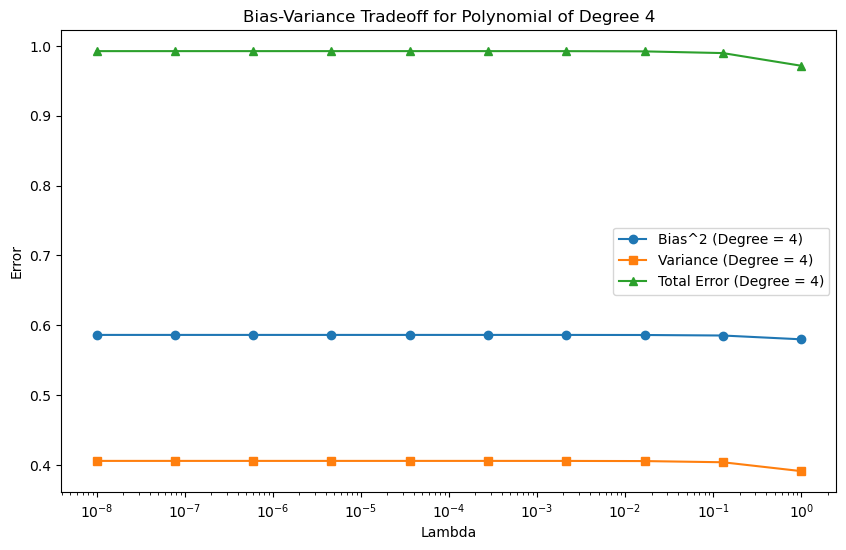

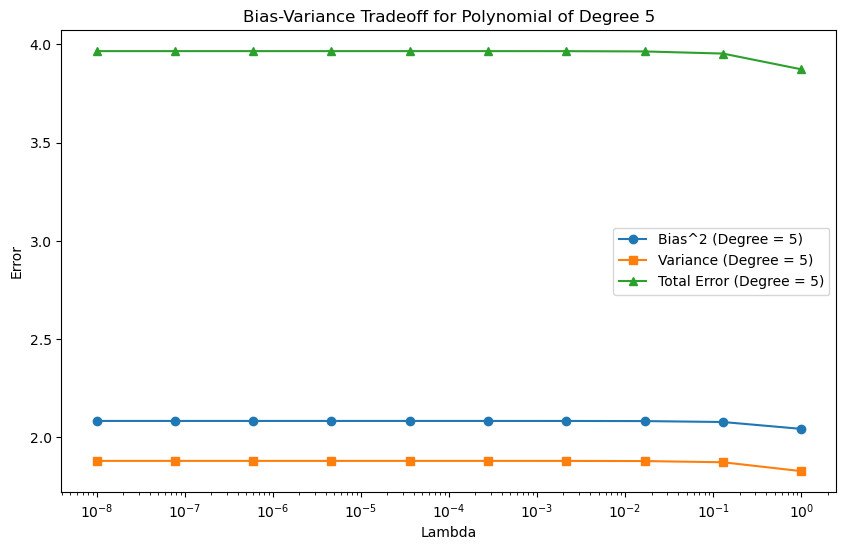

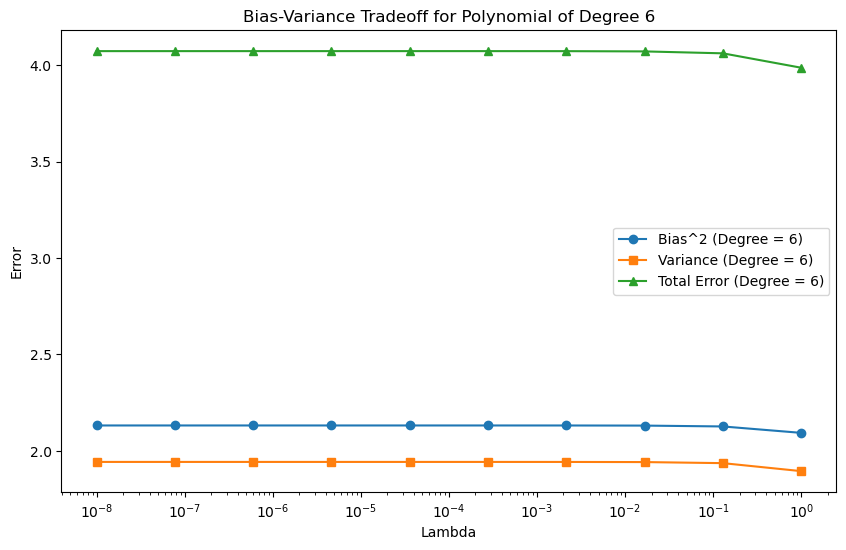

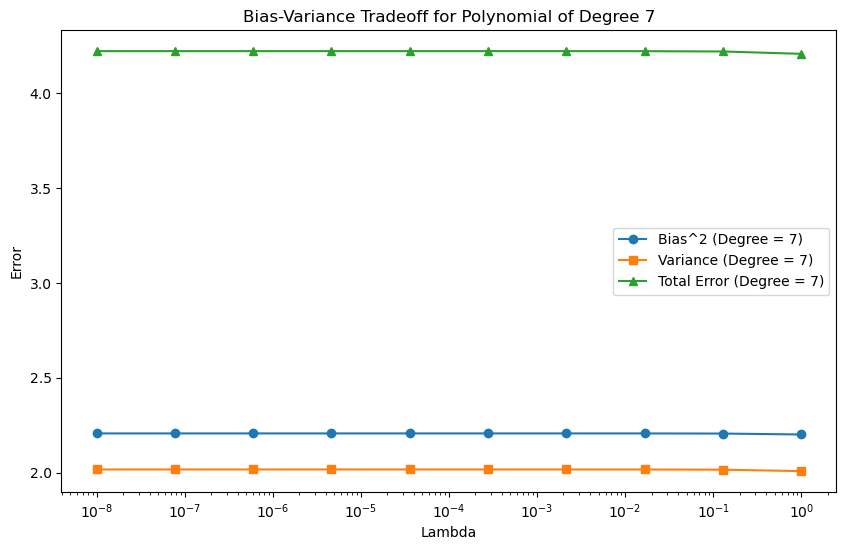

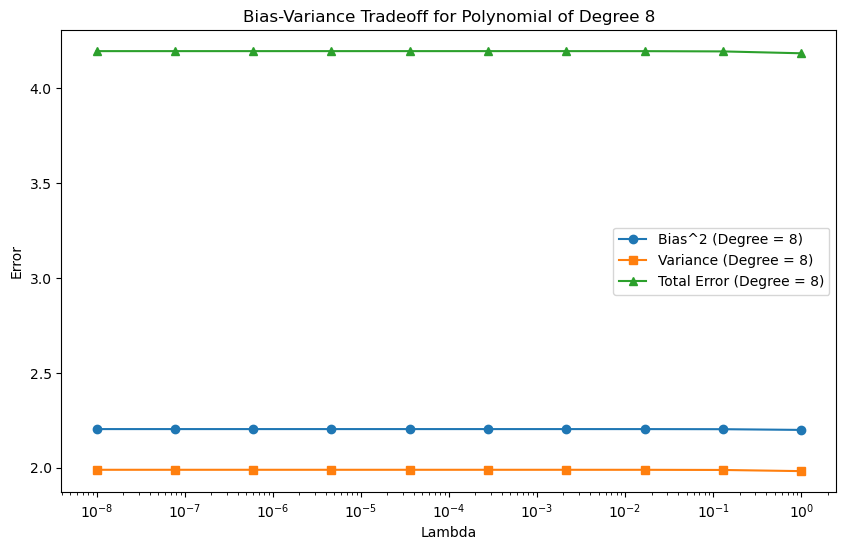

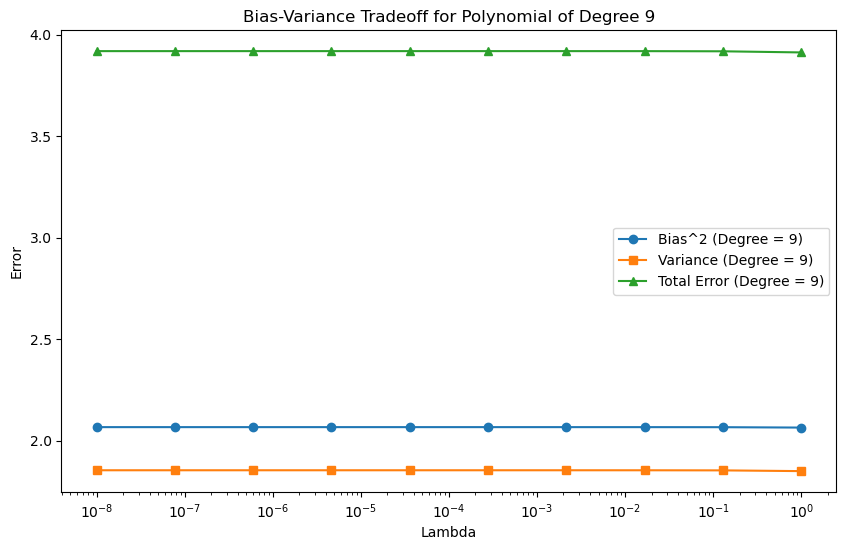

In [455]:
for i, degree in enumerate(degrees):
        plt.figure(figsize=(10, 6))
        plt.plot(lambdas, bias_square[i], label=f'Bias^2 (Degree = {degree})', marker='o')
        plt.plot(lambdas, variance[i], label=f'Variance (Degree = {degree})', marker='s')
        plt.plot(lambdas, total_error[i], label=f'Total Error (Degree = {degree})', marker='^')
        plt.xscale('log')
        plt.xlabel('Lambda')
        plt.ylabel('Error')
        plt.title(f'Bias-Variance Tradeoff for Polynomial of Degree {degree}')
        plt.legend()
        plt.show()

In [460]:
total_err = np.array(total_error)
min_error = np.min(total_err)
min_index = np.unravel_index(np.argmin(total_err), total_err.shape)
min_index

(1, 0)

In [462]:
total_error[1]

[0.3580803911215018,
 0.35808039121950064,
 0.35808039197827074,
 0.35808039785315326,
 0.35808044334022254,
 0.35808079552940614,
 0.35808352236196006,
 0.35810463281488014,
 0.3582679382804363,
 0.35952367591316536]

Hence the optimal value of lambda is 10^-8 for polynomial of degree 2

In [464]:
w_best, b_best

(array([0.08505962, 0.13531222, 0.0931882 ]), 0.0850596220938768)

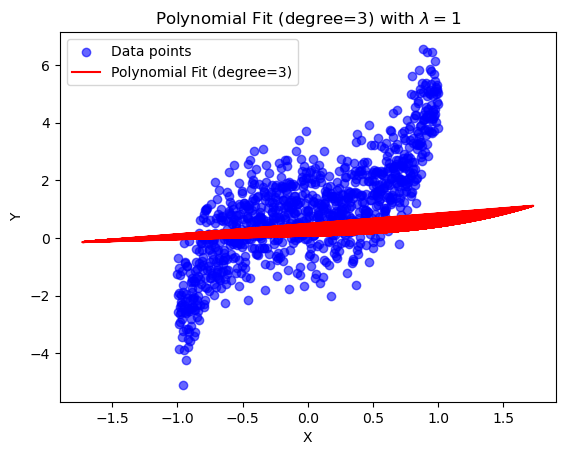

In [470]:
y_best = b_best + (X_train)*w_best[0] + (X_train**2)*w_best[1] + (X_train**3)*w_best[2]
plt.scatter(X, y, label="Data points", color='blue', alpha=0.6)
plt.plot(X_train, y_best, color='red', label='Polynomial Fit (degree=3)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Fit (degree=3) with $\lambda = 1$')
plt.legend()
plt.show()
import warnings
warnings.filterwarnings("ignore")